In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
salary=pd.read_excel("Salary_data_outliers.xlsx")

In [3]:
salary_df = salary.dropna(subset=['PREVAILING_WAGE_PER_YEAR'])

In [4]:
pws = salary_df.groupby(['JOB_TITLE_SUBGROUP'])['PREVAILING_WAGE_PER_YEAR'].mean()

In [5]:
pws

JOB_TITLE_SUBGROUP
assistant professor       59095.076640
attorney                 106295.836568
business analyst          64746.244446
data analyst              62752.650211
data scientist            90545.579707
management consultant     77541.296010
software engineer         84072.555495
teacher                   42392.315614
Name: PREVAILING_WAGE_PER_YEAR, dtype: float64

In [6]:
os = salary_df.groupby(['JOB_TITLE_SUBGROUP'])['PAID_WAGE_PER_YEAR'].mean()

In [7]:
os

JOB_TITLE_SUBGROUP
assistant professor       92600.459355
attorney                 137628.670209
business analyst          71010.569838
data analyst              69855.179562
data scientist           108021.038248
management consultant    107062.226454
software engineer         92250.086312
teacher                   45727.155950
Name: PAID_WAGE_PER_YEAR, dtype: float64

In [8]:
# Every job sub-categories tend to be overpaid. 
wagedif = os.subtract(pws, axis = 0)
wagedif.sort_values(axis=0, ascending=False)

JOB_TITLE_SUBGROUP
assistant professor      33505.382715
attorney                 31332.833642
management consultant    29520.930443
data scientist           17475.458541
software engineer         8177.530816
data analyst              7102.529351
business analyst          6264.325391
teacher                   3334.840336
dtype: float64

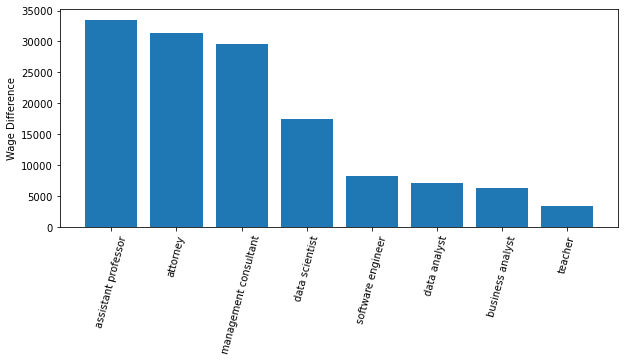

In [9]:
sortedwagedif = wagedif.sort_values(ascending = False)
fig, ax = plt.subplots(figsize=(10,4))
plt.bar(sortedwagedif.index, sortedwagedif)
ax.set_ylabel("Wage Difference")
ax.tick_params(axis='x', labelrotation=75)

In [10]:
cos = salary_df.groupby(['EMPLOYER_NAME'])['PAID_WAGE_PER_YEAR'].mean()
cpws = salary_df.groupby(['EMPLOYER_NAME'])['PREVAILING_WAGE_PER_YEAR'].mean()

In [11]:
# Employers such as ADVANCED TECHNOLOGY GROUP, SECURE ENDPOINTS... tend to underpay their employees
# While HUGHES HUBBARD & REED, THE UNIVERSITY OF TEXAS SYSTEM ADMINISTRATION... tends to overpays their employees
cwagedif = cos.subtract(cpws, axis = 0)
sortedcwagedif = cwagedif.sort_values(axis=0)
sortedcwagedif

EMPLOYER_NAME
BROOKLYN COLLEGE OF THE CITY UNIVERSITY OF NEW YORK    -99859.760000
DEPT OF MEDICINE MEDICAL SERVICE GROUP @ SUNY - H      -64876.240000
RESEARCH FOUNDATION FOR SUNY                           -59783.880000
UC PHYSICIANS INC                                      -56307.680000
THE RESEARCH FOUNDATION OF SUNY                        -52973.960000
                                                           ...      
UNIVERSITY UROLOGY INC                                 208670.453333
UNIVERSITY VASCULAR SURGERY PC                         268028.800000
RADIATION THERAPY FOUNDATION                           281947.000000
KANSAS UNIVERSITY NEUROLOGICAL SURGERY FOUNDATION      352540.000000
KU NEUROLOGICAL SURGERY FOUNDATION                     352540.000000
Length: 22591, dtype: float64